# Price Prediction for Gold, Platinum, and Silver

Supervised Learning - Regression Predictive Models

## 1. Importing Libraries

In [55]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
# for visualisation
import matplotlib.pyplot as plt
# for candlestick chart plotting
import mplfinance as mpf
# for heatmap
import seaborn as sns
# for train test split
from sklearn.model_selection import train_test_split

In [3]:
# configurations for pandas display
pd.options.display.max_columns = 2000
pd.options.display.max_rows = 2000
pd.options.display.max_seq_items = 2000

# Disable all warnings
warnings.filterwarnings("ignore")

In [4]:
# install mplfinance if it is absence
!pip install mplfinance

## 2. Data Understanding
### 2.1 File Reading and Basic Exploring

In [5]:
gold_price = pd.read_csv('gold_price.csv',na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)

In [6]:
gold_price.head(1000)

Open        High         Low       Close   Adj Close  \
Date                                                                     
2011-12-15  154.740005  154.949997  151.710007  152.330002  152.330002   
2011-12-16  154.309998  155.369995  153.899994  155.229996  155.229996   
2011-12-19  155.479996  155.860001  154.360001  154.869995  154.869995   
2011-12-20  156.820007  157.429993  156.580002  156.979996  156.979996   
2011-12-21  156.979996  157.529999  156.130005  157.160004  157.160004   
2011-12-22  156.350006  156.800003  155.330002  156.039993  156.039993   
2011-12-23  156.350006  156.490005  155.820007  156.309998  156.309998   
2011-12-27  155.080002  155.550003  154.539993  154.910004  154.910004   
2011-12-28  154.050003  154.259995  150.660004  151.029999  151.029999   
2011-12-29  149.089996  150.720001  148.270004  150.339996  150.339996   
2011-12-30  152.139999  153.750000  151.789993  151.990005  151.990005   
2012-01-03  154.759995  156.300003  154.550003  155.919998  155.919998   
2012-01-04  155.429993  157.380005  155.339996  156.710007  156.710007   
2012-01-05  155.369995  158.029999  155.250000  157.779999  157.779999   
2012-01-06  158.589996  158.630005  156.380005  157.199997  157.199997   
2012-01-09  157.360001  157.589996  156.190002  156.500000  156.500000   
2012-01-10  158.970001  159.470001  158.470001  158.639999  158.639999   
2012-01-11  159.339996  160.050003  158.910004  159.669998  159.669998   
2012-01-12  161.020004  161.619995  159.830002  160.380005  160.380005   
2012-01-13  159.320007  159.589996  158.009995  159.259995  159.259995   
2012-01-17  161.169998  161.649994  160.419998  160.500000  160.500000   
2012-01-18  159.940002  161.639999  159.679993  161.600006  161.600006   
2012-01-19  160.960007  161.449997  160.330002  161.220001  161.220001   
2012-01-20  160.500000  162.089996  160.000000  162.070007  162.070007   
2012-01-23  162.320007  163.470001  162.320007  163.160004  163.160004   
2012-01-24  161.809998  162.369995  161.529999  162.009995  162.009995   
2012-01-25  161.070007  166.550003  160.289993  166.419998  166.419998   
2012-01-27  167.440002  169.000000  167.410004  168.970001  168.970001   
2012-01-30  168.190002  168.539993  167.740005  168.029999  168.029999   
2012-01-31  169.770004  169.860001  167.720001  169.309998  169.309998   
2012-02-01  169.750000  170.179993  169.080002  169.559998  169.559998   
2012-02-02  169.960007  171.229996  169.679993  171.050003  171.050003   
2012-02-03  169.880005  170.139999  167.509995  167.639999  167.639999   
2012-02-06  166.960007  167.679993  166.610001  167.179993  167.179993   
2012-02-07  167.380005  170.089996  167.149994  169.699997  169.699997   
2012-02-08  169.259995  169.960007  167.500000  168.500000  168.500000   
2012-02-09  170.009995  170.369995  167.669998  168.020004  168.020004   
2012-02-10  166.490005  167.639999  166.330002  167.139999  167.139999   
2012-02-13  167.330002  167.940002  166.740005  167.509995  167.509995   
2012-02-14  167.649994  167.929993  166.419998  167.119995  167.119995   
2012-02-15  168.630005  168.750000  167.190002  168.110001  168.110001   
2012-02-16  166.330002  168.139999  166.169998  168.000000  168.000000   
2012-02-17  168.289993  168.330002  166.869995  167.350006  167.350006   
2012-02-21  169.649994  171.070007  169.589996  171.020004  171.020004   
2012-02-22  170.399994  173.169998  170.190002  172.940002  172.940002   
2012-02-23  172.690002  173.770004  172.279999  173.020004  173.020004   
2012-02-24  172.630005  173.039993  172.000000  172.229996  172.229996   
2012-02-27  172.139999  172.919998  171.580002  171.699997  171.699997   
2012-02-28  172.839996  174.000000  172.600006  173.490005  173.490005   
2012-02-29  173.190002  173.589996  164.000000  164.289993  164.289993   
2012-03-01  166.100006  167.720001  165.750000  166.610001  166.610001   
2012-03-02  166.229996  166.830002  165.630005  166.339996  166.339996   
2012-03-05  165.770004

In [7]:
gold_price.shape

(1718, 80)

Observation:
* The dataset has 1718 rows and 80 columns

In [8]:
gold_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1718 entries, 2011-12-15 to 2018-12-31
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           1718 non-null   float64
 1   High           1718 non-null   float64
 2   Low            1718 non-null   float64
 3   Close          1718 non-null   float64
 4   Adj Close      1718 non-null   float64
 5   Volume         1718 non-null   int64  
 6   SP_open        1718 non-null   float64
 7   SP_high        1718 non-null   float64
 8   SP_low         1718 non-null   float64
 9   SP_close       1718 non-null   float64
 10  SP_Ajclose     1718 non-null   float64
 11  SP_volume      1718 non-null   int64  
 12  DJ_open        1718 non-null   float64
 13  DJ_high        1718 non-null   float64
 14  DJ_low         1718 non-null   float64
 15  DJ_close       1718 non-null   float64
 16  DJ_Ajclose     1718 non-null   float64
 17  DJ_volume      1718 non-null   int

Observation:
* only has two data types: float64 and int64
* indicators for gold are not labelled
* the capitalisation of the naming is not consistent

In [9]:
gold_price.select_dtypes(include=['float64']).columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'SP_open', 'SP_high',
       'SP_low', 'SP_close', 'SP_Ajclose', 'DJ_open', 'DJ_high', 'DJ_low',
       'DJ_close', 'DJ_Ajclose', 'EG_open', 'EG_high', 'EG_low', 'EG_close',
       'EG_Ajclose', 'EU_Price', 'EU_open', 'EU_high', 'EU_low', 'OF_Price',
       'OF_Open', 'OF_High', 'OF_Low', 'OS_Price', 'OS_Open', 'OS_High',
       'OS_Low', 'USB_Price', 'USB_Open', 'USB_High', 'USB_Low', 'PLT_Price',
       'PLT_Open', 'PLT_High', 'PLT_Low', 'PLD_Price', 'PLD_Open', 'PLD_High',
       'PLD_Low', 'USDI_Price', 'USDI_Open', 'USDI_High', 'USDI_Low',
       'GDX_Open', 'GDX_High', 'GDX_Low', 'GDX_Close', 'GDX_Adj Close',
       'USO_Open', 'USO_High', 'USO_Low', 'USO_Close', 'USO_Adj Close'],
      dtype='object')

In [10]:
gold_price.select_dtypes(include=['int64']).columns

Index(['Volume', 'SP_volume', 'DJ_volume', 'EG_volume', 'EU_Trend',
       'OF_Volume', 'OF_Trend', 'OS_Trend', 'SF_Price', 'SF_Open', 'SF_High',
       'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Trend', 'PLT_Trend',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Volume', 'USDI_Trend', 'GDX_Volume',
       'USO_Volume'],
      dtype='object')

Observation:
* Except for 'SF_Price', 'SF_Open', 'SF_High', 'SF_Low', and 'RHO_PRICE', other int64 columns are volume or trend

In [11]:
gold_price.columns[gold_price.columns.str.lower().str.contains('close')]

Index(['Close', 'Adj Close', 'SP_close', 'SP_Ajclose', 'DJ_close',
       'DJ_Ajclose', 'EG_close', 'EG_Ajclose', 'GDX_Close', 'GDX_Adj Close',
       'USO_Close', 'USO_Adj Close'],
      dtype='object')

Observation: 
* the adjusted close are not named consistently.

### 2.2 Initial Features Engineering
#### 2.2.1 Apply Consistent Naming

In [12]:
# Rename and format Gold columns
gold_price.rename(columns={
    'Open': 'GOLD_open',
    'High': 'GOLD_high',
    'Low': 'GOLD_low',
    'Close': 'GOLD_close',
    'Adj Close': 'GOLD_ajclose',
    'Volume': 'GOLD_volume',
    'GDX_Adj Close' : 'GDX_ajclose',
    'USO_Adj Close' : 'USO_ajclose'
}, inplace=True)

# Rename columns with lowercase letters after underscore
gold_price.columns = [col.split('_')[0] + '_' + 
                      '_'.join(part.lower() for part in col.split('_')[1:]) 
                      for col in gold_price.columns]

print(gold_price.columns.tolist())

['GOLD_open', 'GOLD_high', 'GOLD_low', 'GOLD_close', 'GOLD_ajclose', 'GOLD_volume', 'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_ajclose', 'SP_volume', 'DJ_open', 'DJ_high', 'DJ_low', 'DJ_close', 'DJ_ajclose', 'DJ_volume', 'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_ajclose', 'EG_volume', 'EU_price', 'EU_open', 'EU_high', 'EU_low', 'EU_trend', 'OF_price', 'OF_open', 'OF_high', 'OF_low', 'OF_volume', 'OF_trend', 'OS_price', 'OS_open', 'OS_high', 'OS_low', 'OS_trend', 'SF_price', 'SF_open', 'SF_high', 'SF_low', 'SF_volume', 'SF_trend', 'USB_price', 'USB_open', 'USB_high', 'USB_low', 'USB_trend', 'PLT_price', 'PLT_open', 'PLT_high', 'PLT_low', 'PLT_trend', 'PLD_price', 'PLD_open', 'PLD_high', 'PLD_low', 'PLD_trend', 'RHO_price', 'USDI_price', 'USDI_open', 'USDI_high', 'USDI_low', 'USDI_volume', 'USDI_trend', 'GDX_open', 'GDX_high', 'GDX_low', 'GDX_close', 'GDX_ajclose', 'GDX_volume', 'USO_open', 'USO_high', 'USO_low', 'USO_close', 'USO_ajclose', 'USO_volume']


Oberservatiom
* the capitalisation of the naming is consistent

In [13]:
gold_price.columns[gold_price.columns.str.lower().str.contains('close')]

Index(['GOLD_close', 'GOLD_ajclose', 'SP_close', 'SP_ajclose', 'DJ_close',
       'DJ_ajclose', 'EG_close', 'EG_ajclose', 'GDX_close', 'GDX_ajclose',
       'USO_close', 'USO_ajclose'],
      dtype='object')

Observation:
* Now the adjusted close are named consistently.

In [14]:
gold_price.columns[gold_price.columns.str.contains('GOLD')]

Index(['GOLD_open', 'GOLD_high', 'GOLD_low', 'GOLD_close', 'GOLD_ajclose',
       'GOLD_volume'],
      dtype='object')

Observation:
* Gold columns are labelled

#### 2.2.2 Arranging Columns

In [15]:
# Function to extract prefix from a column name
def extract_prefix(col):
    return col.split('_')[0]

# Get unique prefixes and their respective columns
prefix_columns = {}
for col in gold_price.columns:
    prefix = extract_prefix(col)
    if prefix not in prefix_columns:
        prefix_columns[prefix] = []
    prefix_columns[prefix].append(col)

print(prefix_columns.keys())
print()
print(prefix_columns)

dict_keys(['GOLD', 'SP', 'DJ', 'EG', 'EU', 'OF', 'OS', 'SF', 'USB', 'PLT', 'PLD', 'RHO', 'USDI', 'GDX', 'USO'])

{'GOLD': ['GOLD_open', 'GOLD_high', 'GOLD_low', 'GOLD_close', 'GOLD_ajclose', 'GOLD_volume'], 'SP': ['SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_ajclose', 'SP_volume'], 'DJ': ['DJ_open', 'DJ_high', 'DJ_low', 'DJ_close', 'DJ_ajclose', 'DJ_volume'], 'EG': ['EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_ajclose', 'EG_volume'], 'EU': ['EU_price', 'EU_open', 'EU_high', 'EU_low', 'EU_trend'], 'OF': ['OF_price', 'OF_open', 'OF_high', 'OF_low', 'OF_volume', 'OF_trend'], 'OS': ['OS_price', 'OS_open', 'OS_high', 'OS_low', 'OS_trend'], 'SF': ['SF_price', 'SF_open', 'SF_high', 'SF_low', 'SF_volume', 'SF_trend'], 'USB': ['USB_price', 'USB_open', 'USB_high', 'USB_low', 'USB_trend'], 'PLT': ['PLT_price', 'PLT_open', 'PLT_high', 'PLT_low', 'PLT_trend'], 'PLD': ['PLD_price', 'PLD_open', 'PLD_high', 'PLD_low', 'PLD_trend'], 'RHO': ['RHO_price'], 'USDI': ['USDI_price', 'USDI_open', 'USDI_

In [16]:
# Desired prefix order for gold price prediction
desired_prefix_order = ['GOLD', 'EG', 'GDX', #gold related
                        'PLT', 'SF', 'PLD', 'RHO', #precious materials
                        'SP', 'DJ', #stock market indices
                        'EU', 'USDI', #currency indices
                        'OF', 'OS', 'USO', #commodity indices
                        'USB'] #interest rates

# Reorder columns based on desired_prefix_order
reordered_columns = []
for prefix in desired_prefix_order:
    if prefix in prefix_columns:
        reordered_columns.extend(prefix_columns[prefix])

# Reorder prefix_columns dictionary
prefix_columns = {prefix: prefix_columns[prefix] for prefix in desired_prefix_order}

# Reorder the DataFrame columns
gold_price = gold_price[reordered_columns]

# Print the modified column order
print(gold_price.columns.tolist())

['GOLD_open', 'GOLD_high', 'GOLD_low', 'GOLD_close', 'GOLD_ajclose', 'GOLD_volume', 'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_ajclose', 'EG_volume', 'GDX_open', 'GDX_high', 'GDX_low', 'GDX_close', 'GDX_ajclose', 'GDX_volume', 'PLT_price', 'PLT_open', 'PLT_high', 'PLT_low', 'PLT_trend', 'SF_price', 'SF_open', 'SF_high', 'SF_low', 'SF_volume', 'SF_trend', 'PLD_price', 'PLD_open', 'PLD_high', 'PLD_low', 'PLD_trend', 'RHO_price', 'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_ajclose', 'SP_volume', 'DJ_open', 'DJ_high', 'DJ_low', 'DJ_close', 'DJ_ajclose', 'DJ_volume', 'EU_price', 'EU_open', 'EU_high', 'EU_low', 'EU_trend', 'USDI_price', 'USDI_open', 'USDI_high', 'USDI_low', 'USDI_volume', 'USDI_trend', 'OF_price', 'OF_open', 'OF_high', 'OF_low', 'OF_volume', 'OF_trend', 'OS_price', 'OS_open', 'OS_high', 'OS_low', 'OS_trend', 'USO_open', 'USO_high', 'USO_low', 'USO_close', 'USO_ajclose', 'USO_volume', 'USB_price', 'USB_open', 'USB_high', 'USB_low', 'USB_trend']


#### 2.2.3 Change Date's Data Type

In [17]:
gold_price['Date'] = pd.to_datetime(gold_price['Date'])
gold_price['Date'].head(5)

KeyError: 'Date'

### 2.3 Data Exploring with Visualisation

GOLD has no trend column


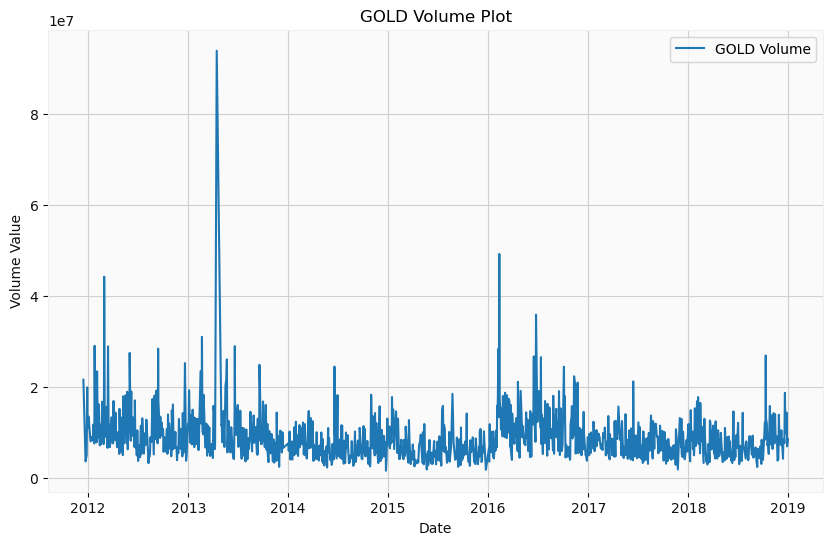

EG has no trend column


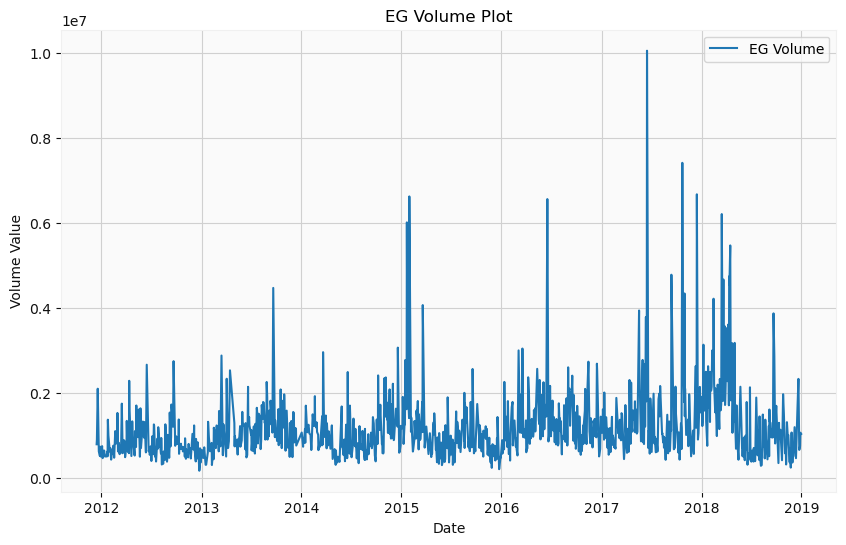

GDX has no trend column


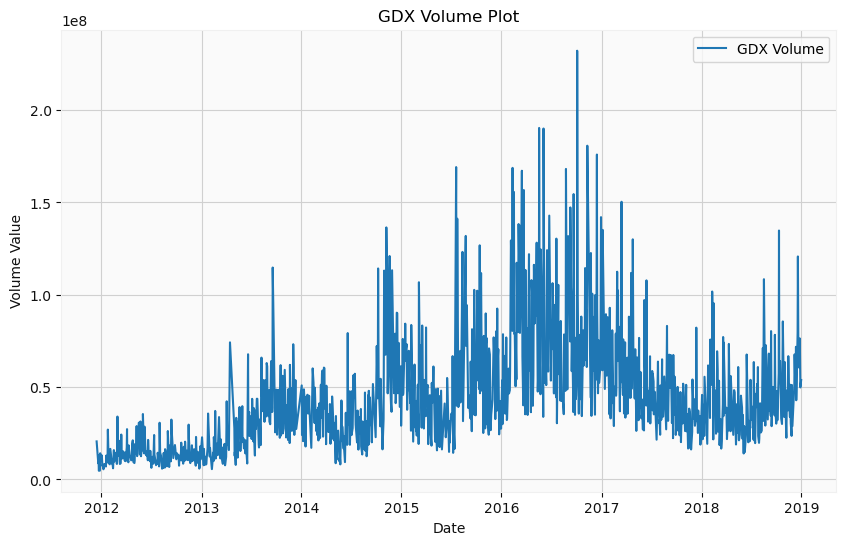

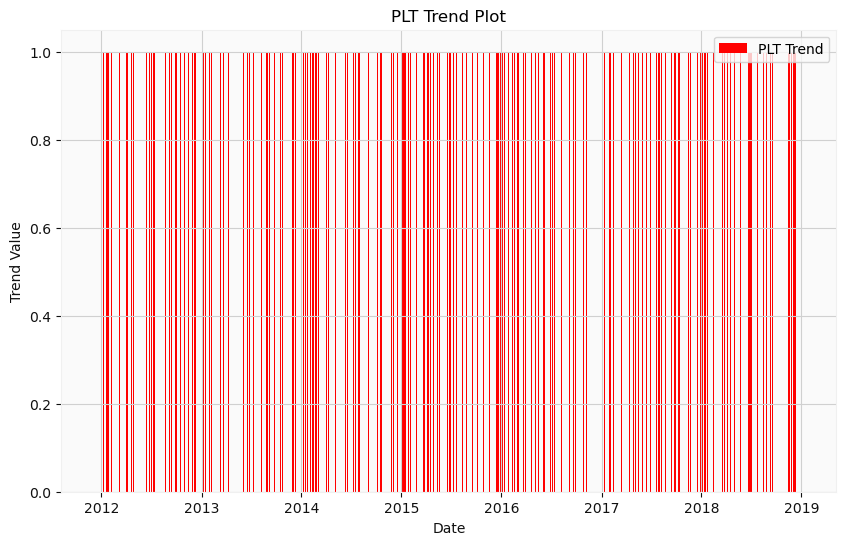

PLT has no volume column


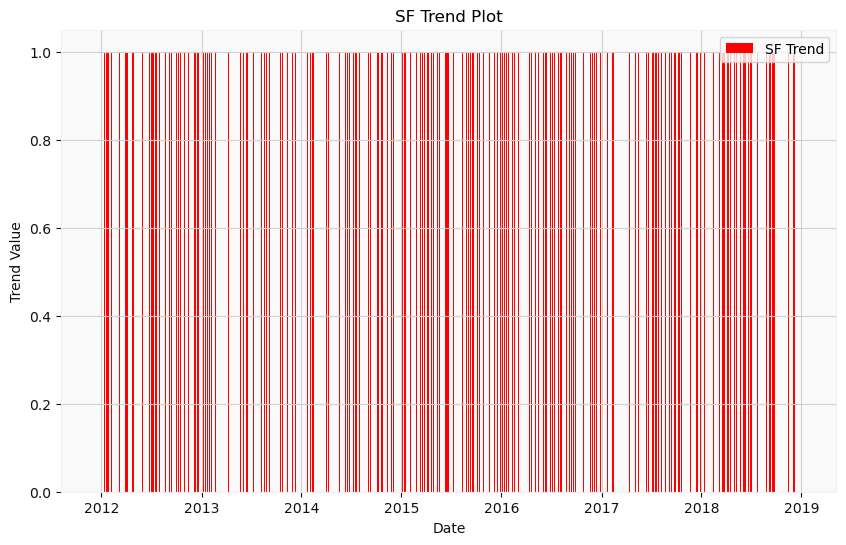

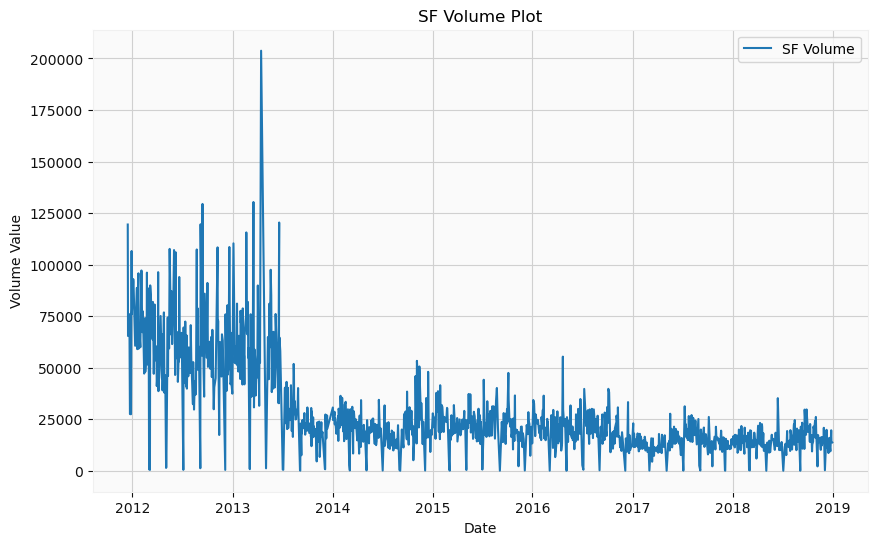

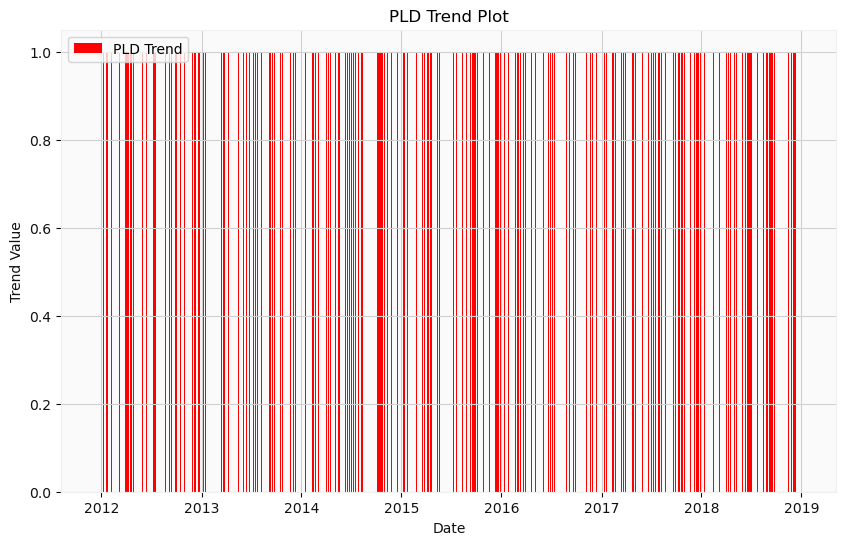

PLD has no volume column
RHO has no trend column
RHO has no volume column
SP has no trend column


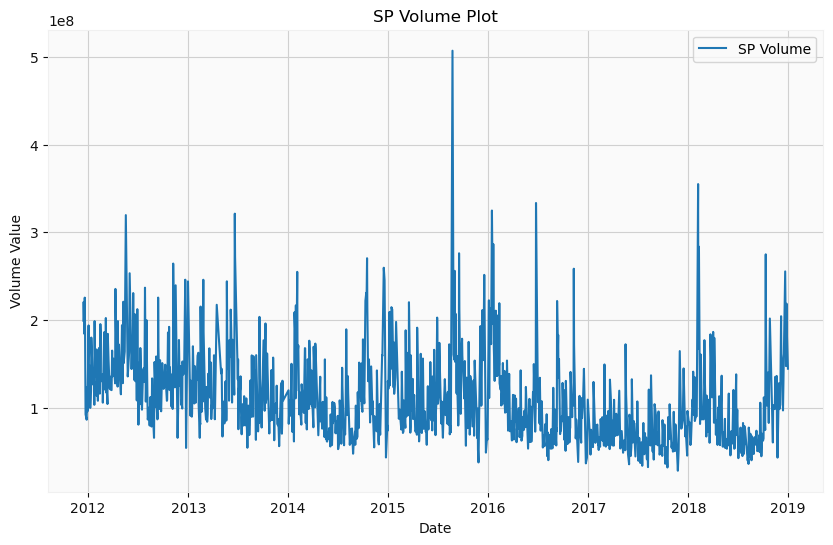

DJ has no trend column


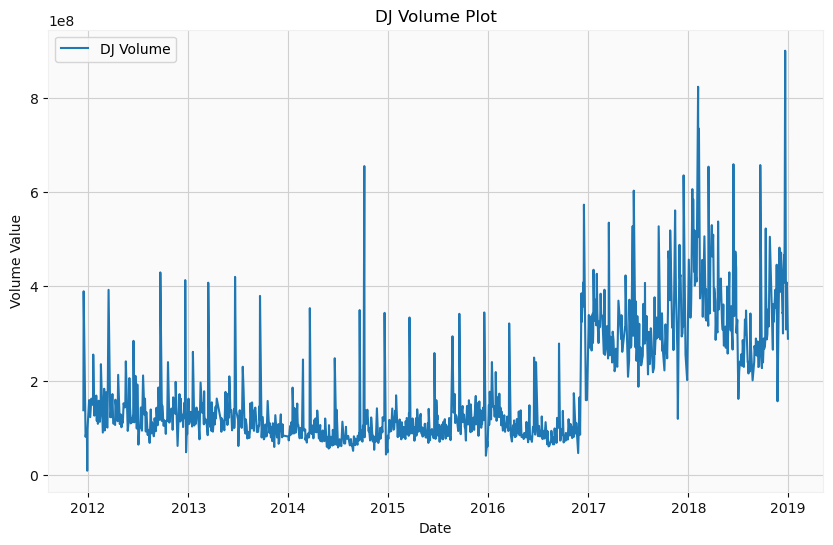

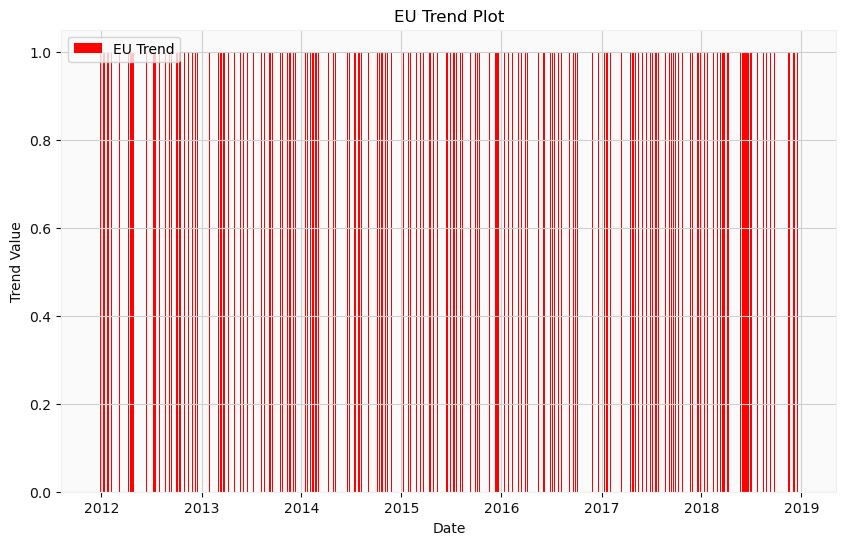

EU has no volume column


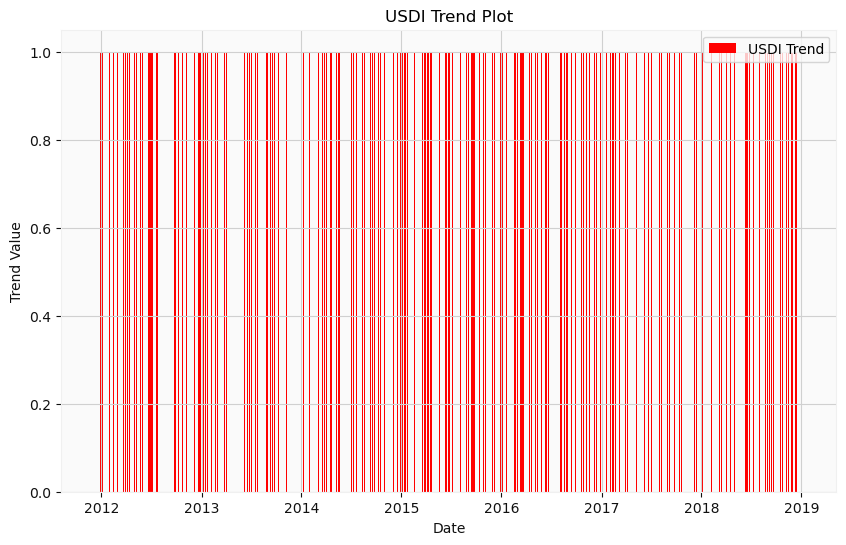

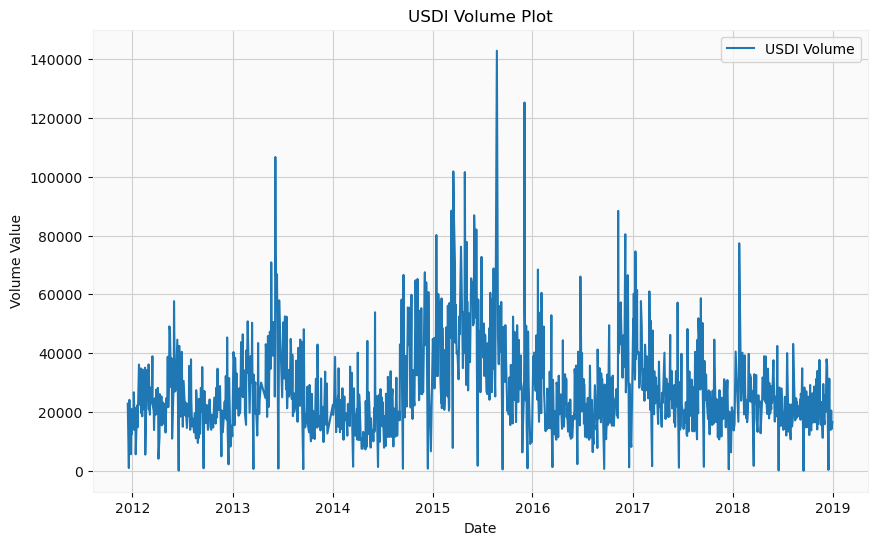

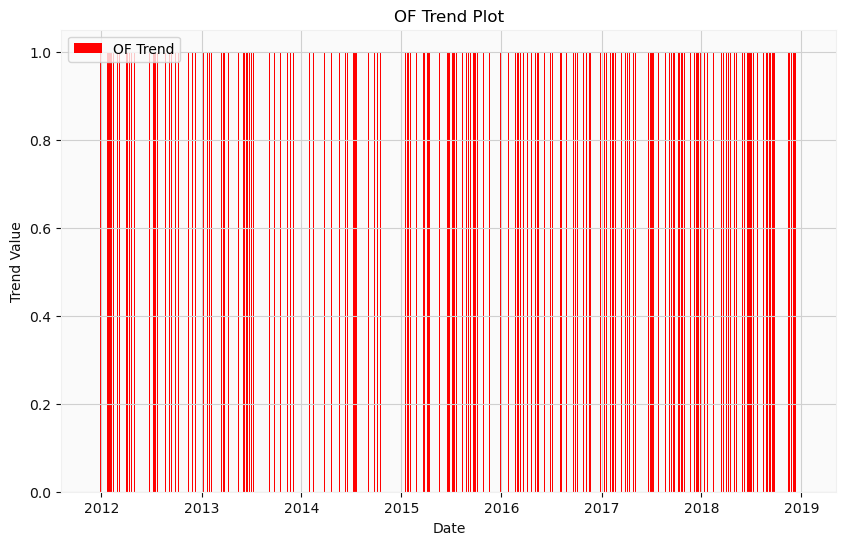

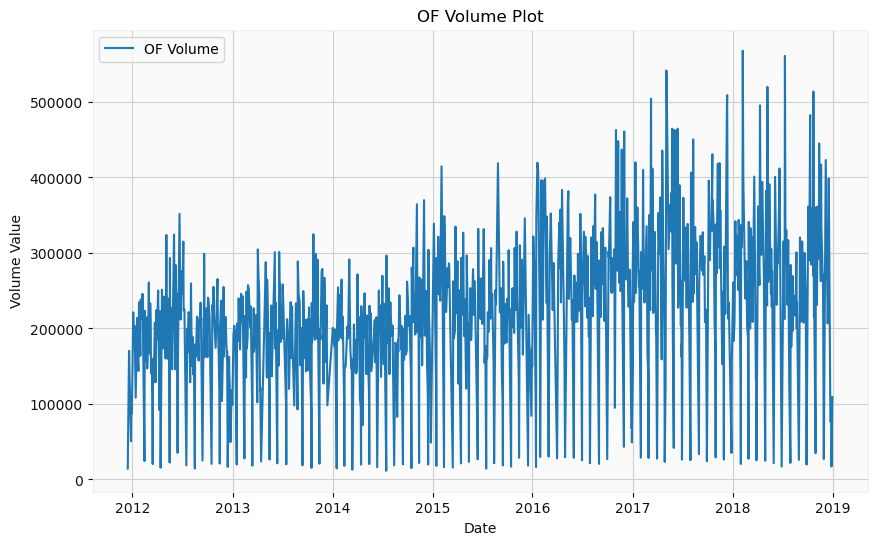

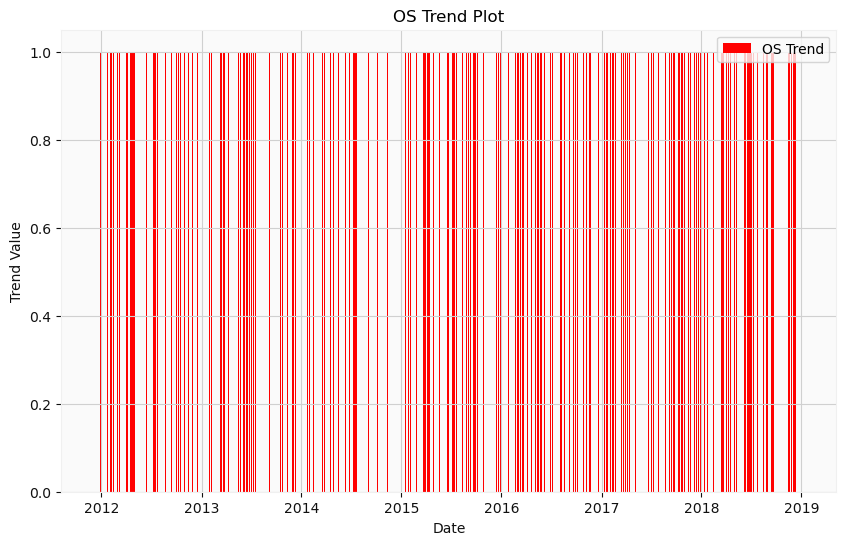

OS has no volume column
USO has no trend column


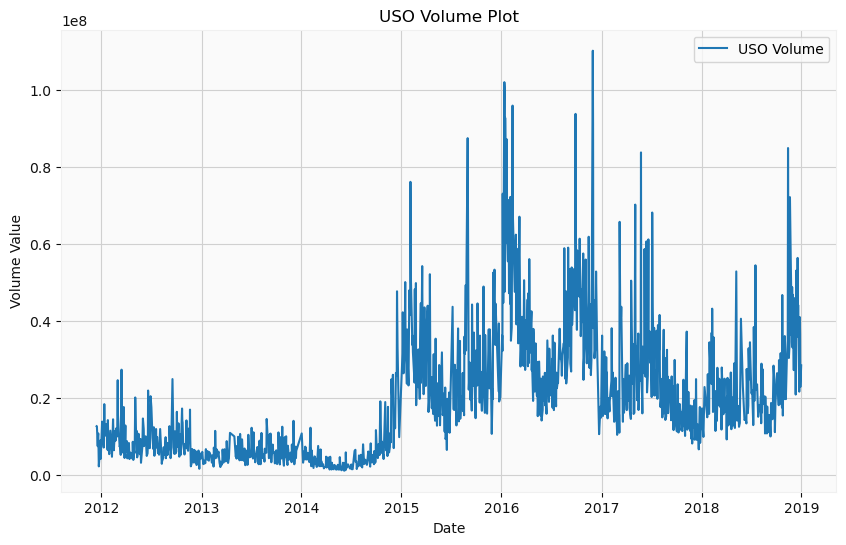

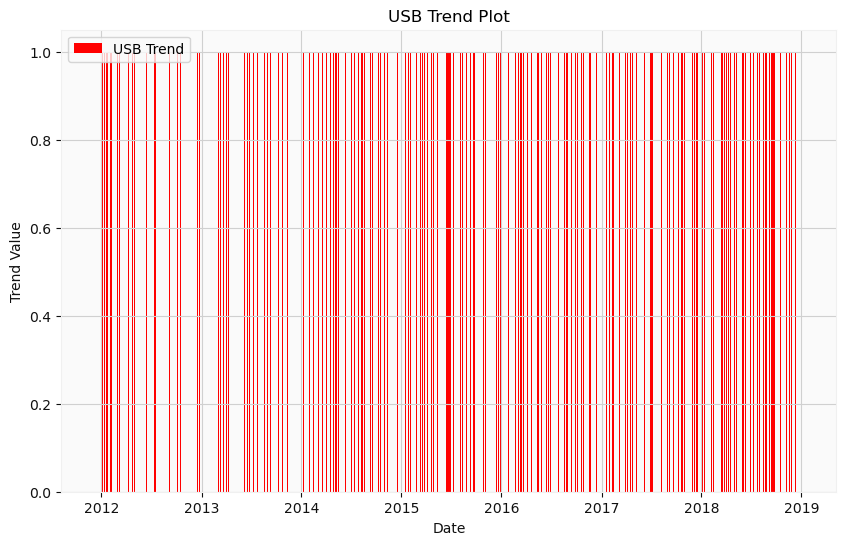

USB has no volume column


In [149]:
# Iterate through the prefixes in the dictionary
for prefix, columns in prefix_columns.items():
    # Check if 'trend' and 'volume' columns exist for the current prefix
    if any(col for col in columns if 'trend' in col):
        # Plot the 'trend' column for the current prefix as a bar plot
        trend_column = next(col for col in columns if 'trend' in col)
        plt.figure(figsize=(10, 6))
        plt.bar(gold_price.index, gold_price[trend_column], color='red', label=f'{prefix} Trend')
        plt.xlabel('Date')
        plt.ylabel('Trend Value')
        plt.title(f'{prefix} Trend Plot')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        # Display a message for prefixes without a 'trend' column
        print(f'{prefix} has no trend column')

    if any(col for col in columns if 'volume' in col):
        # Plot the 'volume' column for the current prefix
        volume_column = next(col for col in columns if 'volume' in col)
        plt.figure(figsize=(10, 6))
        plt.plot(gold_price.index, gold_price[volume_column], label=f'{prefix} Volume')
        plt.xlabel('Date')
        plt.ylabel('Volume Value')
        plt.title(f'{prefix} Volume Plot')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        # Display a message for prefixes without a 'volume' column
        print(f'{prefix} has no volume column')

In [150]:
def plot_line_graph_for_prefixes(prefixes_to_plot):
    # Calculate the number of rows and columns based on the number of prefixes
    num_rows = (len(prefixes_to_plot) + 1) // 2  # Ensures at least 2 plots per row
    num_cols = 2  # Two plots per row

    # Create subplots for each prefix
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(9, 3 * num_rows))
    axes = axes.flatten()  # Flatten the axes array for easier indexing

    for i, prefix in enumerate(prefixes_to_plot):
        ax = axes[i] if len(prefixes_to_plot) > 1 else axes
        columns_to_plot = [col for col in prefix_columns[prefix] 
                           if 'volume' not in col and 'trend' not in col]

        # Plot each column as a line on the same plot
        for col in columns_to_plot:
            ax.plot(gold_price.index, gold_price[col], label=col)

        ax.set_title(f'{prefix}')
        ax.set_xlabel('Date')
        ax.set_ylabel('Value')
        ax.legend()

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

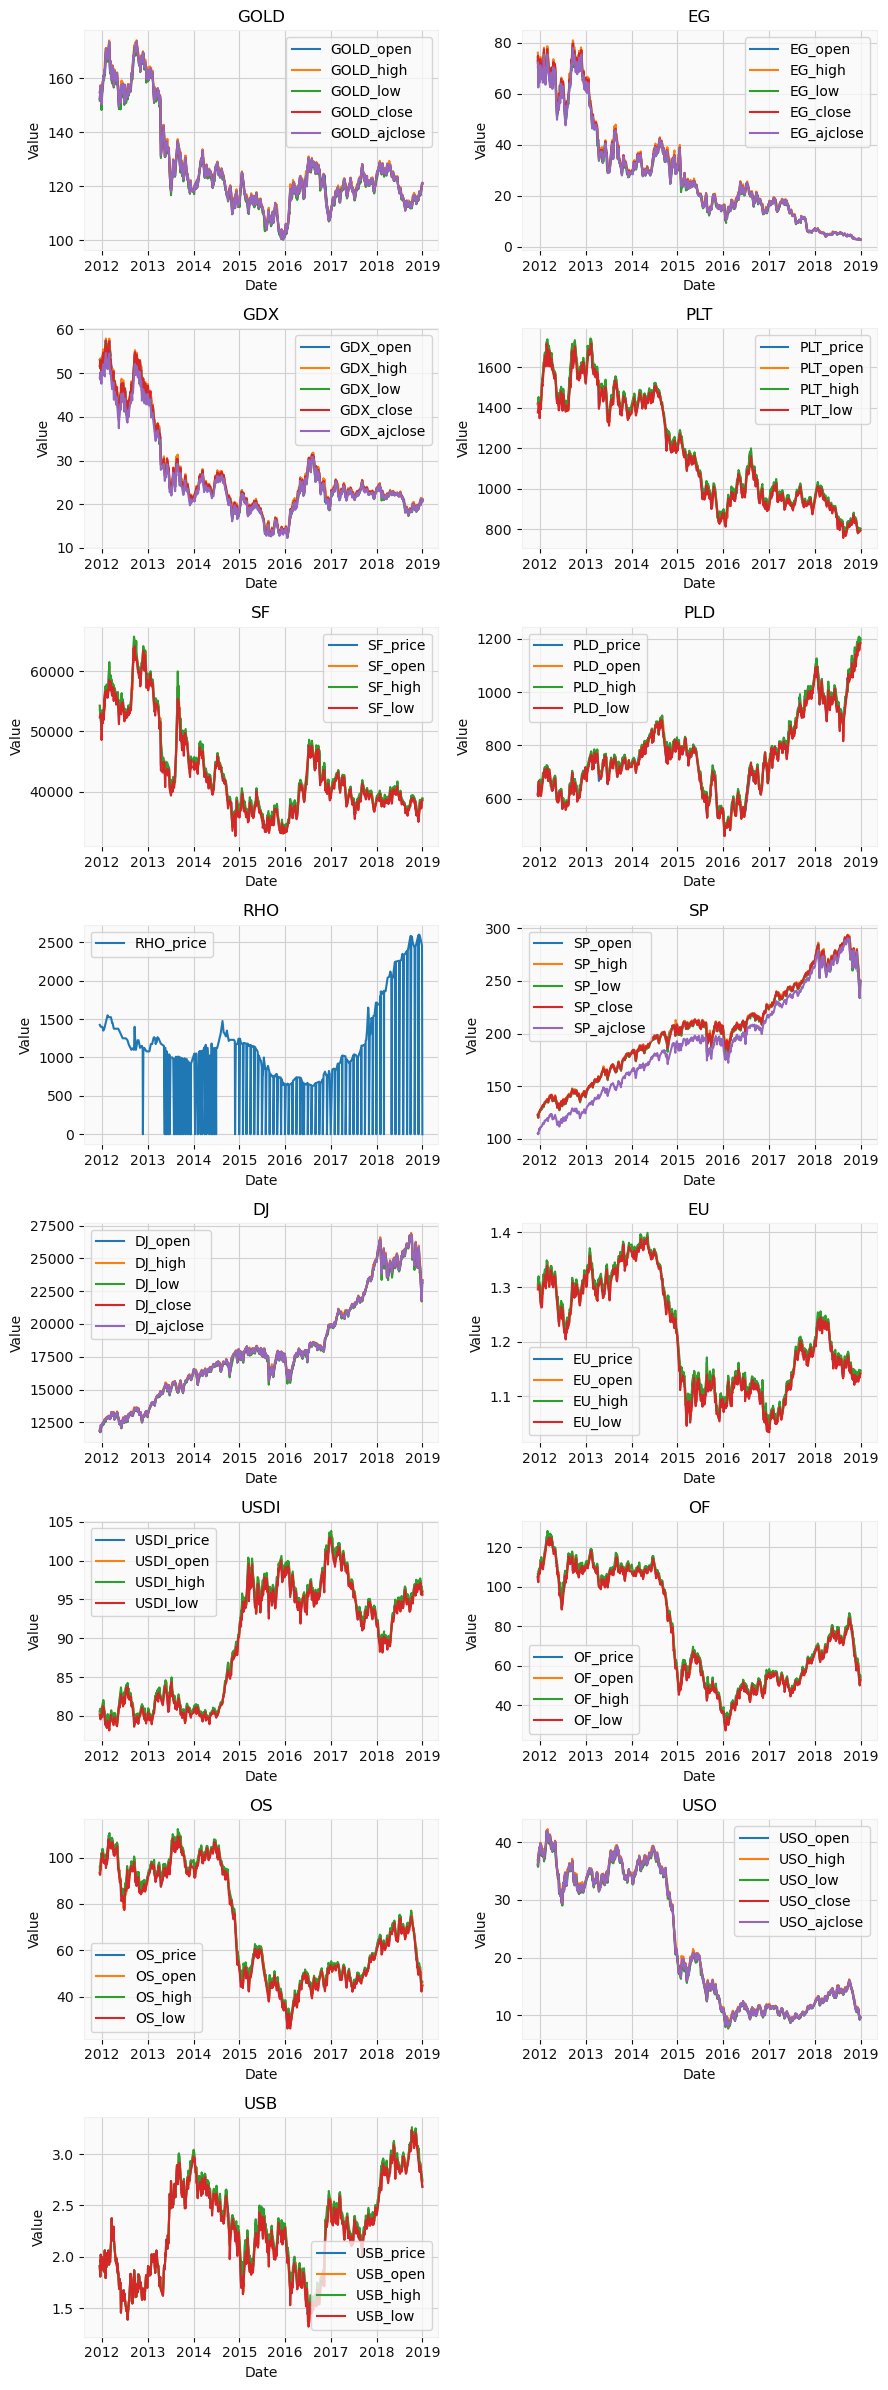

In [151]:
prefixes_to_plot = desired_prefix_order
plot_line_graph_for_prefixes(prefixes_to_plot)

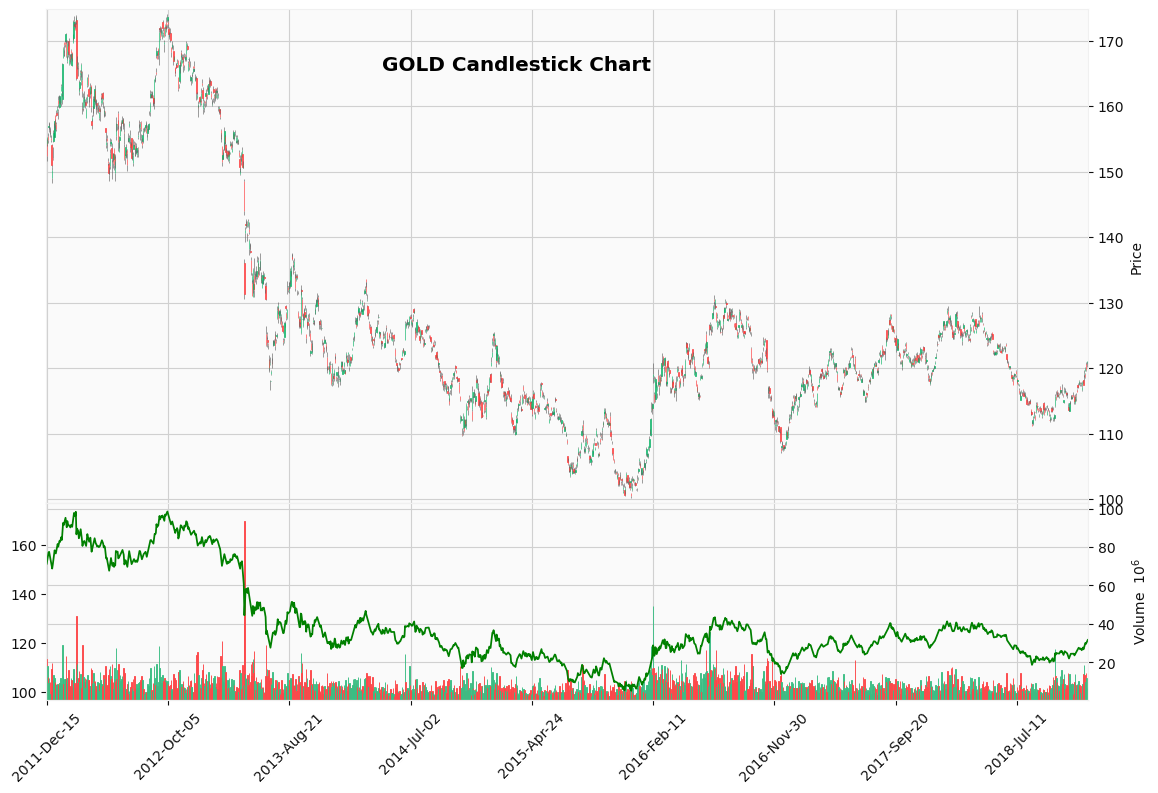

In [152]:
# Define the columns to plot
gold_columns = ['GOLD_open', 'GOLD_high', 'GOLD_low', 'GOLD_ajclose', 'GOLD_volume']

gold_plot = gold_price[gold_columns]

# Rename the columns to match default column names
gold_plot.rename(columns={
    'GOLD_open': 'Open',
    'GOLD_high': 'High',
    'GOLD_low': 'Low',
    'GOLD_ajclose': 'Close',
    'GOLD_volume': 'Volume'
}, inplace=True)

# Plot the candlestick chart
mpf.plot(gold_plot, type='candle', title='GOLD Candlestick Chart', style='yahoo', volume=True, ylabel='Price',
         addplot=[mpf.make_addplot(gold_plot['Close'], panel=1, color='g', secondary_y=True)],
         figratio=(10, 6), figsize=(12, 8), tight_layout=True)

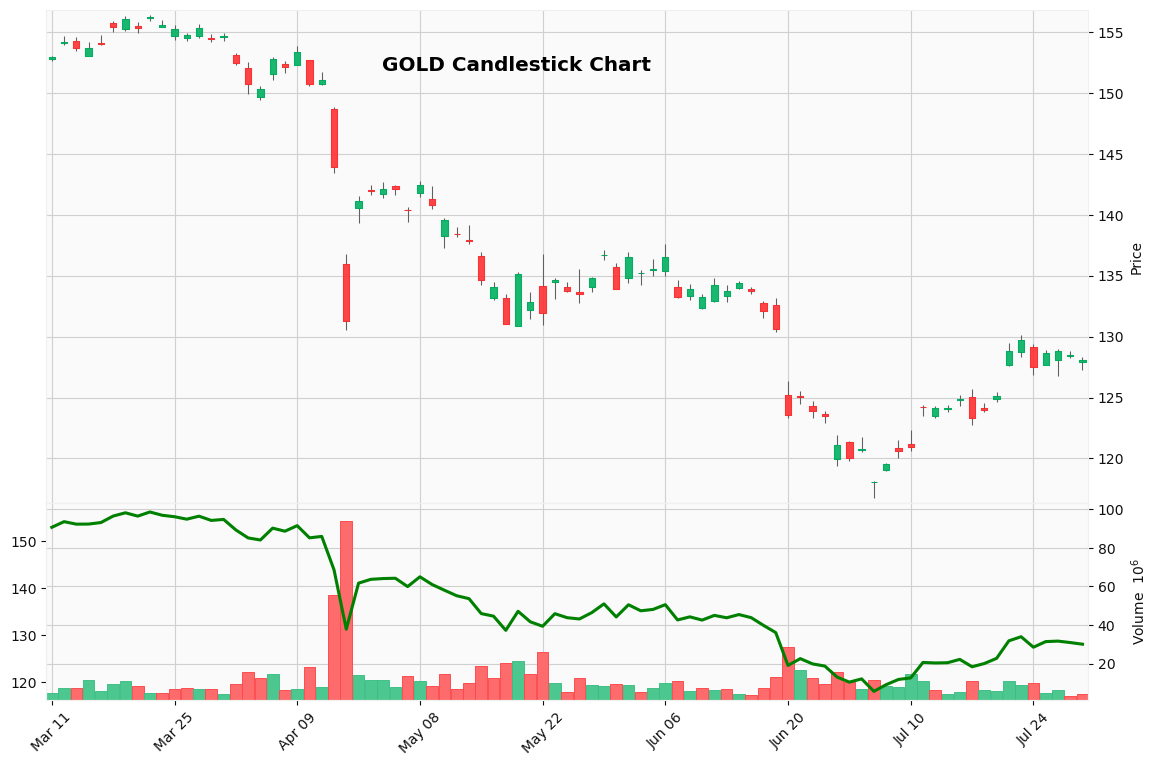

In [153]:
# Filter the DataFrame to include only the desired date range
start_date = '2013-03-10'
end_date = '2013-07-31'
gold_plot_filtered = gold_plot[(gold_plot.index >= start_date) 
                               & (gold_plot.index <= end_date)]

# Plot the candlestick chart with the filtered DataFrame
mpf.plot(gold_plot_filtered, type='candle', title='GOLD Candlestick Chart', style='yahoo', volume=True, ylabel='Price',
         addplot=[mpf.make_addplot(gold_plot_filtered['Close'], panel=1, color='g', secondary_y=True)],
         figratio=(10, 6), figsize=(12, 8), tight_layout=True)

## 3. Data Preparation
### 3.1 Dealing with Missing Values

In [70]:
gold_price.isnull().any().any()

False

In [74]:
# Check for '0' values in each column and count them
zero_value_counts = (gold_price == 0).sum()

# Filter columns with at least one '0' value and not containing 'trend' in the name
filtered_columns = [col for col in zero_value_counts.index 
                    if 'trend' not in col 
                    and zero_value_counts[col] > 0]

# Print the columns and their '0' value counts
for column in filtered_columns:
    count = zero_value_counts[column]
    print(f"{column}: {count}")

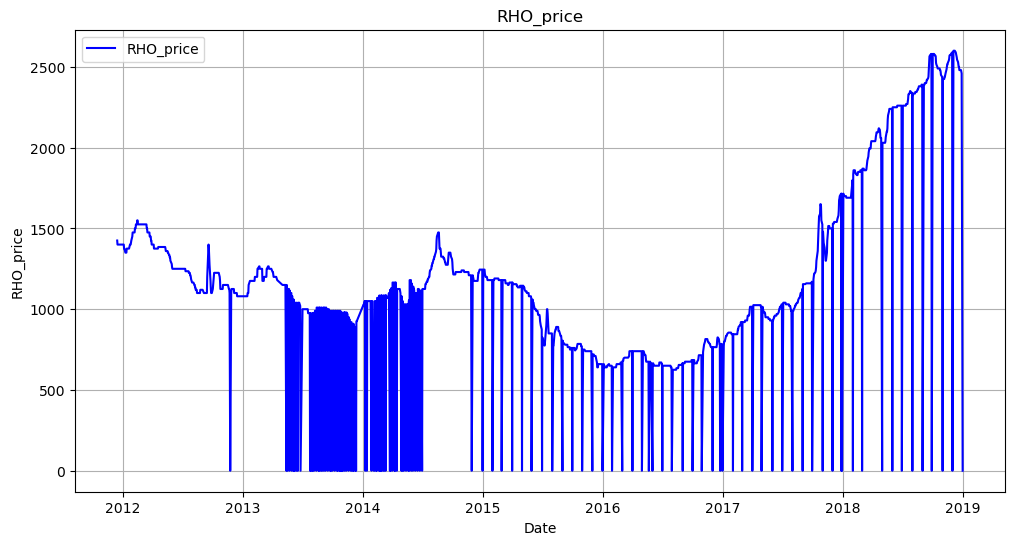

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(gold_price.index, gold_price['RHO_price'], label='RHO_price', color='blue')
plt.xlabel('Date')
plt.ylabel('RHO_price')
plt.title('RHO_price')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
# Replace '0' values in 'RHO_price' with NaN
gold_price['RHO_price'].replace(0, np.nan, inplace=True)

# Perform linear interpolation to fill missing values
gold_price['RHO_price'].interpolate(method='linear', inplace=True)

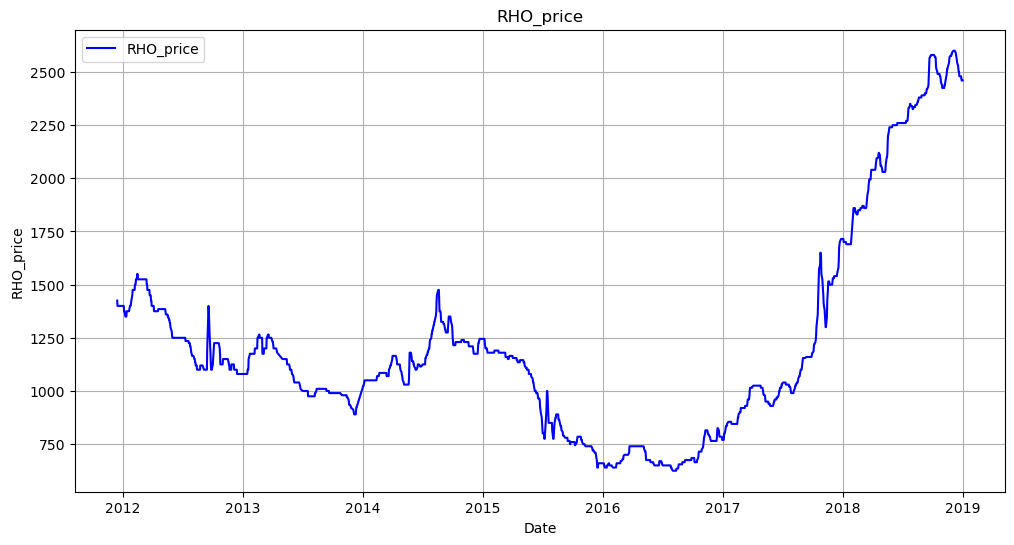

In [47]:
plt.figure(figsize=(12, 6))
plt.plot(gold_price.index, gold_price['RHO_price'], label='RHO_price', color='blue')
plt.xlabel('Date')
plt.ylabel('RHO_price')
plt.title('RHO_price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# outliers

In [187]:
# find correlation

In [56]:
# Assuming you already have 'all_corr' as a Series
gold_ajclose_corr = gold_price.corrwith(gold_price['GOLD_ajclose'])

# Convert the Series to a DataFrame
gold_ajclose_corr_df = pd.DataFrame({'Corr_GOLD_ajclose': 
                            gold_ajclose_corr.sort_values(ascending=False)})

# Display the DataFrame
gold_ajclose_corr_df

# 0.073140 (RHO after)
# 0.095782 (RHO before)

Corr_GOLD_ajclose
GOLD_close             1.000000
GOLD_ajclose           1.000000
GOLD_high              0.999535
GOLD_low               0.999532
GOLD_open              0.998976
GDX_low                0.975561
GDX_close              0.975459
GDX_high               0.975255
GDX_ajclose            0.974980
GDX_open               0.974824
SF_low                 0.947842
SF_price               0.947420
SF_open                0.945557
SF_high                0.945203
EG_low                 0.863917
EG_open                0.862900
EG_close               0.862770
EG_high                0.861479
EG_ajclose             0.859850
PLT_price              0.775861
PLT_high               0.775481
PLT_low                0.773993
PLT_open               0.773760
OF_high                0.711334
OF_price               0.710693
OF_open                0.709096
OF_low                 0.708266
SF_volume              0.706505
USO_close              0.635675
USO_ajclose            0.635675
USO_high               0.635311
USO_open               0.635197
USO_low                0.634732
OS_high                0.632001
OS_price               0.630817
OS_open                0.630046
OS_low                 0.629083
EU_high                0.582969
EU_price               0.581036
EU_open                0.579036
EU_low                 0.577000
GOLD_volume            0.246778
SP_volume              0.241949
RHO_price              0.073140
OS_trend               0.059510
OF_trend               0.048205
SF_trend               0.028100
PLD_trend              0.026536
EU_trend               0.019913
PLT_trend              0.011355
USDI_trend            -0.016641
USB_trend             -0.025933
EG_volume             -0.126586
DJ_volume             -0.155526
USDI_volume           -0.205954
PLD_price             -0.213179
PLD_low               -0.214919
PLD_open              -0.216426
PLD_high              -0.217490
OF_volume             -0.225436
USB_low               -0.417352
USB_open              -0.440822
USB_price             -0.441347
USO_volume            -0.456193
USB_high              -0.464116
GDX_volume            -0.514616
DJ_low                -0.588157
DJ_ajclose            -0.588411
DJ_close              -0.588411
DJ_high               -0.588778
DJ_open               -0.588800
SP_ajclose            -0.666071
SP_low                -0.683750
SP_close              -0.684284
SP_open               -0.684618
SP_high               -0.684904
USDI_high             -0.720023
USDI_open             -0.720140
USDI_price            -0.721569
USDI_low              -0.722078

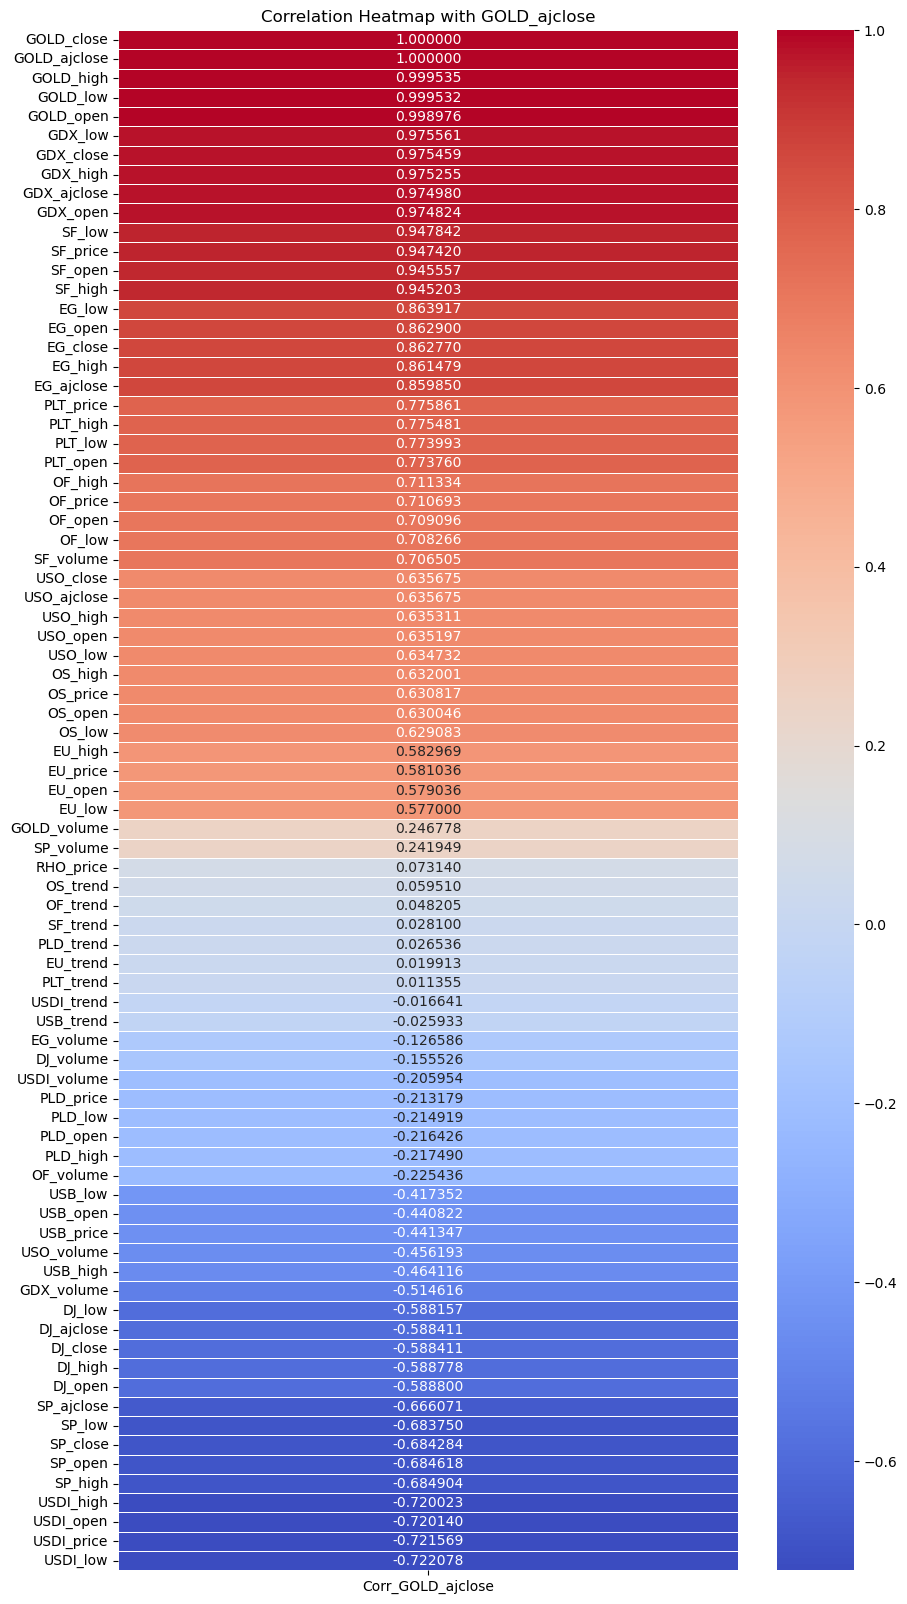

In [57]:
# Create a heatmap for the correlations
plt.figure(figsize=(10, 20))
sns.heatmap(gold_ajclose_corr_df, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".6f")
plt.title('Correlation Heatmap with GOLD_ajclose')
plt.show()

In [60]:
gold_ajclose_corr_df[gold_ajclose_corr_df['Corr_GOLD_ajclose'] > 0.7]

Corr_GOLD_ajclose
GOLD_close             1.000000
GOLD_ajclose           1.000000
GOLD_high              0.999535
GOLD_low               0.999532
GOLD_open              0.998976
GDX_low                0.975561
GDX_close              0.975459
GDX_high               0.975255
GDX_ajclose            0.974980
GDX_open               0.974824
SF_low                 0.947842
SF_price               0.947420
SF_open                0.945557
SF_high                0.945203
EG_low                 0.863917
EG_open                0.862900
EG_close               0.862770
EG_high                0.861479
EG_ajclose             0.859850
PLT_price              0.775861
PLT_high               0.775481
PLT_low                0.773993
PLT_open               0.773760
OF_high                0.711334
OF_price               0.710693
OF_open                0.709096
OF_low                 0.708266
SF_volume              0.706505

In [61]:
# Two sets of train-test split datasets:
# 1: X_all_train, X_all_test, y_all_train, y_all_test
# 2: X_high_corr_train, X_high_corr_test, y_high_corr_train, y_high_corr_test

# GOLD_ajclose as the y value 
y = gold_price['GOLD_ajclose']

# 1: X_all_train, X_all_test, y_all_train, y_all_test
# Splitting the dataset with all features
X_all = gold_price.drop(columns=['GOLD_ajclose'])  # Exclude the target column
# Perform the train-test split (70% train, 30% test)
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, y, test_size=0.3, random_state=0)

# 2: X_high_corr_train, X_high_corr_test, y_high_corr_train, y_high_corr_test
# Features with correlation > 0.7
high_corr_features = gold_ajclose_corr_df[gold_ajclose_corr_df['Corr_GOLD_ajclose'] > 0.7].index.tolist()
# Splitting the dataset with high correlated features
X_high_corr = gold_price[high_corr_features]
# Perform the train-test split (70% train, 30% test)
X_high_corr_train, X_high_corr_test, y_high_corr_train, y_high_corr_test = train_test_split(X_high_corr, y, test_size=0.3, random_state=0)

In [65]:
from sklearn.model_selection import GridSearchCV

# Create a Decision Tree regressor
dt = DecisionTreeRegressor(random_state=0)

# Define a grid of hyperparameters to search
param_grid = {
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],   # Minimum number of samples required at each leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Create a GridSearchCV object
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV to the data with all features
grid_search.fit(X_all_train, y_all_train)

# Get the best parameters and best estimator from the grid search
best_params = grid_search.best_params_
best_dt = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5}


In [68]:
# Decision Tree

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Create and fit a Decision Tree model for the dataset with all features
dt_all = DecisionTreeRegressor(random_state=0)
dt_all.fit(X_all_train, y_all_train)

# Make predictions on the test set with all features
y_all_pred = dt_all.predict(X_all_test)

# Calculate the mean squared error for the predictions with all features
mse_all = mean_squared_error(y_all_test, y_all_pred)
print(f"Mean Squared Error (All Features): {mse_all}")

# Create and fit a Decision Tree model for the dataset with high-correlation features
dt_high_corr = DecisionTreeRegressor(random_state=0)
dt_high_corr.fit(X_high_corr_train, y_high_corr_train)

# Make predictions on the test set with high-correlation features
y_high_corr_pred = dt_high_corr.predict(X_high_corr_test)

# Calculate the mean squared error for the predictions with high-correlation features
mse_high_corr = mean_squared_error(y_high_corr_test, y_high_corr_pred)
print(f"Mean Squared Error (High-Correlation Features): {mse_high_corr}")

Mean Squared Error (All Features): 0.053504422265852995
Mean Squared Error (High-Correlation Features): 0.03383150121833706


In [67]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Define the best hyperparameters
best_max_depth = None
best_max_features = 'auto'
best_min_samples_leaf = 2
best_min_samples_split = 5

# Create a Decision Tree model for the dataset with best parameters
dt_all = DecisionTreeRegressor(
    max_depth=best_max_depth,
    max_features=best_max_features,
    min_samples_leaf=best_min_samples_leaf,
    min_samples_split=best_min_samples_split,
    random_state=0
)

# fir data to model
dt_all.fit(X_all_train, y_all_train)

# Make predictions on the test set with all features
y_all_pred = dt_all.predict(X_all_test)

# Calculate the mean squared error for the predictions with all features
mse_all = mean_squared_error(y_all_test, y_all_pred)
print(f"Mean Squared Error (All Features): {mse_all}")

# Create and fit a Decision Tree model for the dataset with high-correlation features
dt_high_corr = DecisionTreeRegressor(random_state=0)
dt_high_corr.fit(X_high_corr_train, y_high_corr_train)

# Make predictions on the test set with high-correlation features
y_high_corr_pred = dt_high_corr.predict(X_high_corr_test)

# Calculate the mean squared error for the predictions with high-correlation features
mse_high_corr = mean_squared_error(y_high_corr_test, y_high_corr_pred)
print(f"Mean Squared Error (High-Correlation Features): {mse_high_corr}")

Mean Squared Error (All Features): 0.053504422265852995
Mean Squared Error (High-Correlation Features): 0.03383150121833706


In [ ]:
# normalising
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)
feature_minmax_transform.head()

In [ ]:
# KNN

In [ ]:
# Linear Regression

In [ ]:
# SVM

In [ ]:
plt_corr = gold_price.corr().abs()['PLT_Price'].sort_values(ascending = False)
plt_corr

In [ ]:
silver_corr = gold_price.corr().abs()['SF_Price'].sort_values(ascending = False)
silver_corr

In [ ]:
# List of columns you want to keep
columns_to_keep = [
    'Date', 'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low', 'PLT_Trend'
]

# Create the new DataFrame by selecting the desired columns
new_df = gold_price[columns_to_keep]

# Display the first 5 rows (head) of the new DataFrame
print(new_df.tail(10))